<div style="font-family: Arial; font-weight: bold; font-size: 2.1em; color: #00b3e5; text-align: center;">
    Python Graded Group Assignment-03<br><br>
    Web Development using Flask
</div>


# Domain:

   ○ Finance and Banking

# Context:

    Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customers first apply for a home loan after that company manually validates the customer eligibility for loan. Company wants to automate the loan eligibility process based on customer detail provided while filling the details online. They need a web application where a user can access their website and register, login, and enter the required details such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others for checking the eligibility for the home loan.

# Project Objective:
   
   
   1) This is a standard supervised classification task. A classification problem where we have to predict whether a customer is eligible for loan or not based on a given set of independent variable(s).
   2) To build a Python Flask ML application where a user has to get registered by entering the username and password and login to the website and then enter their details to check whether they are eligible for loan or not.

# Dataset Description:

In [1]:
# Create a DataFrame with attribute information
import pandas as pd
attribute_info = pd.DataFrame({
    'Attribute': ['Loan ID', 'Gender', 'Married', 'Dependents', 'Self employed', 'Education', 'Applicant Income', 'Co Applicant Income', 'Loan Amount', 'Loan Amount Term', 'Credit History', 'Property area', 'Loan Status (Target)'],
    'Description': ['Unique Loan ID', 'Male or Female', 'Applicant married (Y/N)', 'Number of dependents', 'Self employed (Y/N)', 'Graduate/Undergraduate', 'Applicant income (in dollars)', 'Co Applicant Income (in dollars)', 'Loan amount in thousands (in dollars)', 'Term of loan in months', 'Credit history meets guidelines Yes/No(1/0)', 'Urban/Semi Urban/Rural', 'Loan Approved (Y/N)']
})

attribute_info

,Attribute,Description
0,Loan ID,Unique Loan ID
1,Gender,Male or Female
2,Married,Applicant married (Y/N)
3,Dependents,Number of dependents
4,Self employed,Self employed (Y/N)
5,Education,Graduate/Undergraduate
6,Applicant Income,Applicant income (in dollars)
7,Co Applicant Income,Co Applicant Income (in dollars)
8,Loan Amount,Loan amount in thousands (in dollars)
9,Loan Amount Term,Term of loan in months


<div style="font-family: Arial; font-weight: bold; font-size: 2.1em; color: #00b3e5; text-align: center;">
     ● Model Building and saving the model using Pickle:
</div>  

### 1. Import required libraries and read the dataset.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
## Reading the dataset 'loan_approval_data.csv'
try:
    df = pd.read_csv('loan_approval_data.csv')
except FileNotFoundError: # if file path is invalid of the file does not exist
    print("File not found.")
except pd.errors.EmptyDataError: # if the file is empty or has no data
    print("No data")
except pd.errors.ParserError: # if the file has malformed or invalid data that cannot be parsed.
    print("Parse error")
except UnicodeDecodeError: # if the file has a different encoding than the default or specified one.
    print("Encoding error")
except Exception: # handling other exceptions
    print("Error encountered! Please review your code")

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
##Check the first few samples
df.sample(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
60,lp001205,male,yes,0.0,graduate,no,2500,3796.0,120.0,360.0,1.0,urban,y
494,lp002585,male,yes,0.0,graduate,no,3597,2157.0,119.0,360.0,0.0,rural,n
144,lp001508,male,yes,2.0,graduate,no,11757,0.0,187.0,180.0,1.0,urban,y
576,lp002872,NaN,yes,0.0,graduate,no,3087,2210.0,136.0,360.0,0.0,semiurban,n
86,lp001280,male,yes,2.0,not graduate,no,3333,2000.0,99.0,360.0,NaN,semiurban,y


In [5]:
# shape is the (rows, columns) in a dataset
df.shape

(614, 13)

- The dataset has 614 rows and 13 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


**Observations:**

   - There are 614 rows and 13 columns
   - The columns include various data types such as integer, float and object
   - Some columns have missing data, noticeable like 'gender','married', 'dependents','self_employed','loanamount','loan_amount_term','credit_history'
   - The DataFrame contains information related to House-loan-eligibility, including attributes like loan_id, gender, married, dependents, education, and various skill-related attributes.
   - Some columns like 'loan_id', 'gender','married','education', 'self_employed','property_area','loan_status' is in string format and required conversion to numeric column for analysis
   - Loan ID is unique



In [7]:
# Descriptive analysis of numerical value
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
applicantincome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicantincome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loanamount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [8]:
# Descriptive analysis of categorical value
df.describe(include = 'O').T

,count,unique,top,freq
loan_id,614,614,lp001002,1
gender,601,2,male,489
married,611,2,yes,398
education,614,2,graduate,480
self_employed,582,2,no,500
property_area,614,3,semiurban,233
loan_status,614,2,y,422


In [9]:
## the number of unique rows in each attribute
df.nunique()

loan_id              614
gender                 2
married                2
dependents             4
education              2
self_employed          2
applicantincome      505
coapplicantincome    287
loanamount           203
loan_amount_term      10
credit_history         2
property_area          3
loan_status            2
dtype: int64

In [10]:
## the number of duplicated records in the dataset
df.duplicated().sum()

0

- This Dataset does not have any duplicate records

### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features.

In [11]:
## the number of missing or null values in each attribute
df.isnull().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

- We can observe that there is missing values present in several columns of dataset.
- lets handle them

In [12]:
## For categorical variables like gender, married, dependents, self_employed, and credit_history,
## Replacing missing values with the mode (the most frequent value) 
## since they represent categorical attributes.This can be done using the fillna() method in pandas.
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['married'].fillna(df['married'].mode()[0], inplace=True)
df['dependents'].fillna(df['dependents'].mode()[0], inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)
df['credit_history'].fillna(df['credit_history'].mode()[0], inplace=True)

In [13]:
## For loan_amount_term, loanamount, which seems to represent a numerical value, 
## Replace missing values with the median or mean of the existing values.
df['loan_amount_term'].fillna(df['loan_amount_term'].mean(), inplace=True)
df['loanamount'].fillna(df['loanamount'].mean(), inplace=True)

In [14]:
## Reverrifying the number of missing or null values in each attribute
df.isnull().sum()/len(df)*100

loan_id              0.0
gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

- All the null values have been handled successfully

**drop redundant features**

In [15]:
df.drop('loan_id',axis=1, inplace=True)

### 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

In [16]:
## getting all object datatype from the dataset
cat_features = df.select_dtypes(include=[np.object_])
cat_features.columns

Index(['gender', 'married', 'education', 'self_employed', 'property_area',
       'loan_status'],
      dtype='object')

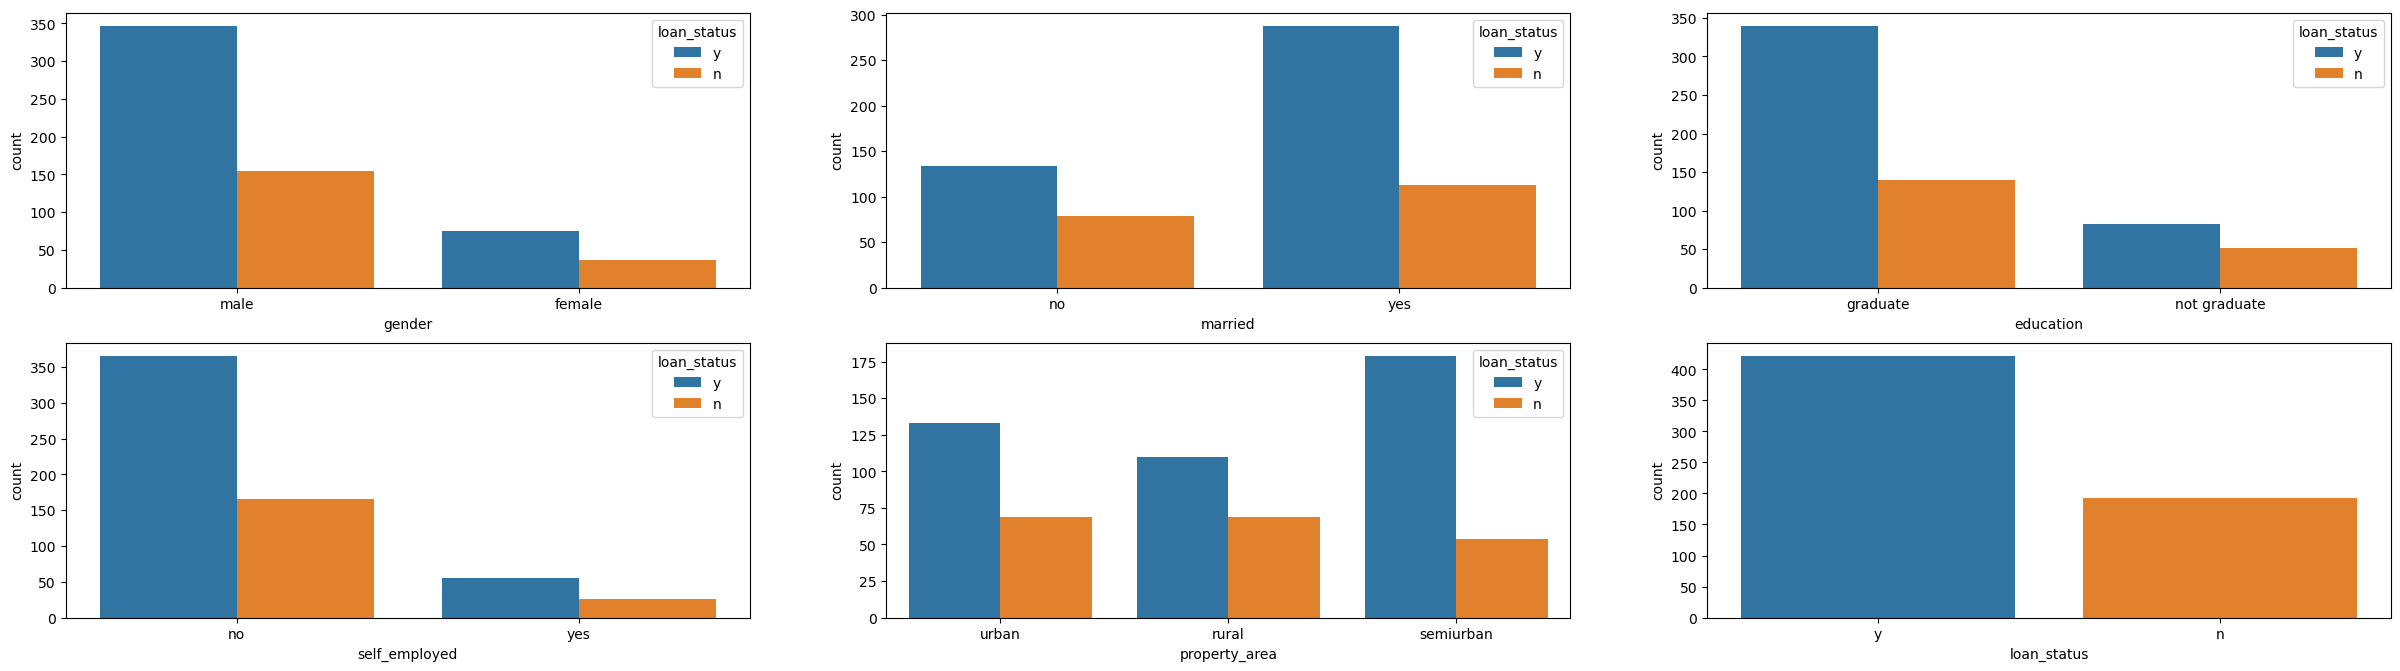

In [17]:
## Visualize the distribution of the target column 'loan_status' with respect to various categorical features
i = 1
plt.figure(figsize=(30,25))

for feature in cat_features:
    plt.subplot(6,3,i)
    sns.countplot(x=feature, hue='loan_status', data=df)
    i += 1

### Inference:

- **gender:** Majority of the Loan holder are male as compared to females..
- **married** Most of the loan holders are married, suggesting that marital status could be a factor considered in loan applications or approvals.
- **education:** Graduate individuals have a higher number of approved loans, implying that education level might influence loan eligibility or application success.
- **self_employed:** Majority of people who has taken loan are not self-employed.suggesting that employment status could play a role in loan approval processes.
- **property_area:** Loans are distributed across urban, rural, and semi-urban areas, but the number of loans is higher in semi-urban areas. This suggests that people residing in semi-urban areas might have higher demand or accessibility to loans compared to urban or rural areas..


### 5. Encode the categorical data.

In [18]:
# select object datatype variable
df['gender'] = df['gender'].replace({'male':1, 'female':0})
df['married'] = df['married'].replace({'yes':1, 'no':0})
df['self_employed'] = df['self_employed'].replace({'yes':1, 'no':0})
df['education'] = df['education'].replace({'graduate':1, 'not graduate':0})
df['property_area'] = df['property_area'].replace({'urban':2, 'semiurban':1, 'rural':0})
df['loan_status'] = df['loan_status'].replace({'y':1, 'n':0})

In [19]:
## Verifying the dataset after handling categorical data
df.head(2)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    int64  
 1   married            614 non-null    int64  
 2   dependents         614 non-null    float64
 3   education          614 non-null    int64  
 4   self_employed      614 non-null    int64  
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         614 non-null    float64
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    float64
 10  property_area      614 non-null    int64  
 11  loan_status        614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


- from the above information it is observed that there is no object type data. 

### 6. Separate the target and independent features and split the data into train and test.

In [21]:
## Split the dataset into two parts based on target variable and independet variable
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [22]:
## train_test_split() is used to divide dataset into training and test set
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


### 7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [23]:
def fit_and_predict(model, X_train,X_test, y_train,y_test):
    #fit the model with train data
    model.fit(X_train,y_train)
    
    #Making predictions on test set
    pred = model.predict(X_test)
    
    #Calculating the accuracy score
    accuracy = accuracy_score(y_test, pred)
    
    return accuracy

In [24]:
# Initializing the Models

lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf',rf),('knn',knn),('gb',gb),('adb',adb)]
sc = StackingClassifier(estimators = estimators, final_estimator=rf)

In [25]:
result = pd.DataFrame(columns=['Accuracy'])

for model, model_name in zip([lr,nb,knn,dt,rf,adb,gb,sc],
                            ['Logistic Regression','Naive Bayes','KNN','Descision Tree',
                            'Random Forest','Ada Boost','Gradient Boost','Stacking']):
    result.loc[model_name] = fit_and_predict(model, X_train, X_test, y_train, y_test)

In [26]:
result

,Accuracy
Logistic Regression,0.789189
Naive Bayes,0.783784
KNN,0.632432
Descision Tree,0.675676
Random Forest,0.783784
Ada Boost,0.778378
Gradient Boost,0.789189
Stacking,0.789189


- Logistic Regression and Random Forest stand out as top performers, followed closely by Ada Boost and Gradient Boost. 
- Naive Bayes performs relatively well but may be limited by its independence assumption.
- As logistic regression acheived 82% we will build our model with logistic regression.

In [27]:
# Using Logistic Regression
lr = LogisticRegression()

# Train the model
model = lr.fit(X_train,y_train)

# Make predictions on train and test sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#Accuracy score
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('accuracy train:',accuracy_train)
print('accuarcy test',accuracy_test)

accuracy train: 0.8205128205128205
accuarcy test 0.7891891891891892


- The model shows good performance, with slightly higher accuracy on the test set compared to the training set. This suggests that the model generalizes well to unseen data

**save your model using pickle.**

In [28]:
import pickle

#saving model to disk
pickle.dump(model, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))